In [ ]:
import pandas as pd
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/txt_reviews.zip'

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_datas')

In [ ]:
product_ids = []
user_ids = []
profile_names = []
helpfulness_numerators = []
helpfulness_denominators = []
scores = []
times = []
review_summaries = []
review_texts = []

In [ ]:
directory_path = '/content/extracted_datas/txt_reviews'


text_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.txt')]


for file in text_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        data = {}
        for line in lines:
            key, value = line.strip().split(': ', 1)
            data[key] = value

        product_ids.append(data.get('ProductId', ''))
        user_ids.append(data.get('UserId', ''))
        profile_names.append(data.get('ProfileName', ''))
        helpfulness_numerators.append(int(data.get('HelpfulnessNumerator', '0')))
        helpfulness_denominators.append(int(data.get('HelpfulnessDenominator', '0')))
        scores.append(int(data.get('Score', '0')))
        times.append(int(data.get('Time', '0')))
        review_summaries.append(data.get('ReviewSummary', ''))
        review_texts.append(data.get('ReviewText', ''))


data = {
    'ProductId': product_ids,
    'UserId': user_ids,
    'ProfileName': profile_names,
    'HelpfulnessNumerator': helpfulness_numerators,
    'HelpfulnessDenominator': helpfulness_denominators,
    'Score': scores,
    'Time': times,
    'ReviewSummary': review_summaries,
    'ReviewText': review_texts
}
df = pd.DataFrame(data)


df.head()


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001OVIAEC,A23A8IEVT5N1EK,Bad Daddy Brad,0,0,5,1327622400,the best treat ever,"My little Pebbles....i call em chicky bones, a..."
1,B007TGDXMK,#oc-R242XV3ENMZELQ,Pockets,0,1,1,1345852800,Very strong,I like strong coffee but was able to use the c...
2,B000SDO5YQ,A1QOZ2N5RLIY32,phidler,2,2,4,1240272000,"A bit watery, but a great bargain.",Because of the extraordinary value (under 30 c...
3,B001E95KRE,A1KBSVJTXZHMC,Lucki,1,1,5,1176595200,What a treat!,Our dog loves these treats and we love how goo...
4,B00061EZBS,A16OQH5HLCUQMQ,Filip Dubovsky,1,1,5,1176595200,Frank's lime rocks.......totally,This is the most shreddin' sauce ever. The lim...


In [ ]:
df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


In [ ]:
df['Helpfulness'].fillna(0, inplace=True)

df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001OVIAEC,A23A8IEVT5N1EK,Bad Daddy Brad,0,0,5,1327622400,the best treat ever,"My little Pebbles....i call em chicky bones, a...",0.0
1,B007TGDXMK,#oc-R242XV3ENMZELQ,Pockets,0,1,1,1345852800,Very strong,I like strong coffee but was able to use the c...,0.0
2,B000SDO5YQ,A1QOZ2N5RLIY32,phidler,2,2,4,1240272000,"A bit watery, but a great bargain.",Because of the extraordinary value (under 30 c...,1.0
3,B001E95KRE,A1KBSVJTXZHMC,Lucki,1,1,5,1176595200,What a treat!,Our dog loves these treats and we love how goo...,1.0
4,B00061EZBS,A16OQH5HLCUQMQ,Filip Dubovsky,1,1,5,1176595200,Frank's lime rocks.......totally,This is the most shreddin' sauce ever. The lim...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568454 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568454 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Helpfulness             568454 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [ ]:
df['Review Time'] = pd.to_datetime(df["Time"], unit = 's').dt.tz_localize('UTC').dt.tz_convert('Asia/Hong_Kong').dt.strftime('%d-%m-%Y')
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,Review Time
0,B001OVIAEC,A23A8IEVT5N1EK,Bad Daddy Brad,0,0,5,1327622400,the best treat ever,"My little Pebbles....i call em chicky bones, a...",0.0,27-01-2012
1,B007TGDXMK,#oc-R242XV3ENMZELQ,Pockets,0,1,1,1345852800,Very strong,I like strong coffee but was able to use the c...,0.0,25-08-2012
2,B000SDO5YQ,A1QOZ2N5RLIY32,phidler,2,2,4,1240272000,"A bit watery, but a great bargain.",Because of the extraordinary value (under 30 c...,1.0,21-04-2009
3,B001E95KRE,A1KBSVJTXZHMC,Lucki,1,1,5,1176595200,What a treat!,Our dog loves these treats and we love how goo...,1.0,15-04-2007
4,B00061EZBS,A16OQH5HLCUQMQ,Filip Dubovsky,1,1,5,1176595200,Frank's lime rocks.......totally,This is the most shreddin' sauce ever. The lim...,1.0,15-04-2007


In [ ]:
csv_file_path = '/content/txt_reviews.csv'
df.to_csv(csv_file_path, index=False)
print("CSV file saved successfully.")

CSV file saved successfully.


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/txt_reviews.csv")

In [ ]:
columns = ['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Review Time', 'ReviewSummary', 'ReviewText', 'Score' ]
df = df[columns]

df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review Time,ReviewSummary,ReviewText,Score
0,B001OVIAEC,A23A8IEVT5N1EK,Bad Daddy Brad,0,0,0.0,27-01-2012,the best treat ever,"My little Pebbles....i call em chicky bones, a...",5
1,B007TGDXMK,#oc-R242XV3ENMZELQ,Pockets,0,1,0.0,25-08-2012,Very strong,I like strong coffee but was able to use the c...,1
2,B000SDO5YQ,A1QOZ2N5RLIY32,phidler,2,2,1.0,21-04-2009,"A bit watery, but a great bargain.",Because of the extraordinary value (under 30 c...,4
3,B001E95KRE,A1KBSVJTXZHMC,Lucki,1,1,1.0,15-04-2007,What a treat!,Our dog loves these treats and we love how goo...,5
4,B00061EZBS,A16OQH5HLCUQMQ,Filip Dubovsky,1,1,1.0,15-04-2007,Frank's lime rocks.......totally,This is the most shreddin' sauce ever. The lim...,5


In [ ]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score
count,568454.000000,568454.00000,568454.000000,568454.000000
mean,1.743817,2.22881,0.407862,4.183199
std,7.636513,8.28974,0.462068,1.310436
min,0.000000,0.00000,0.000000,1.000000
25%,0.000000,0.00000,0.000000,4.000000
50%,0.000000,1.00000,0.000000,5.000000
75%,2.000000,2.00000,1.000000,5.000000
max,866.000000,923.00000,3.000000,5.000000


<Axes: xlabel='Score', ylabel='count'>

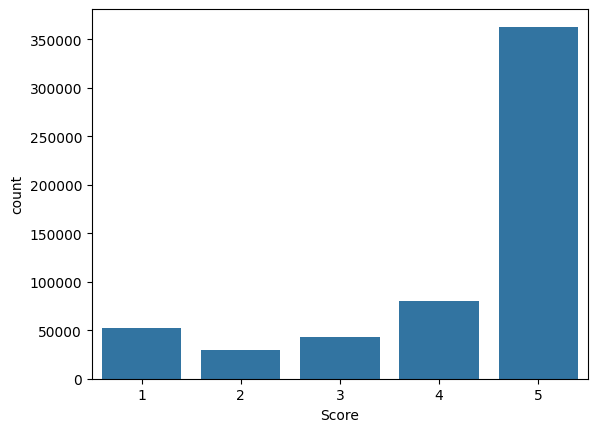

In [ ]:
sns.countplot(x='Score', data=df)

Task A - Perform data preprocessing on the given text data and convert it into numerical vectors.

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['cleaned_text'] = df['ReviewText'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text).lower())

In [ ]:
df['tokens'] = df['cleaned_text'].apply(lambda text: word_tokenize(text))

In [ ]:
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review Time,ReviewSummary,ReviewText,Score,cleaned_text,tokens,filtered_tokens,lemmatized_tokens,lemmatized_text
0,B001OVIAEC,A23A8IEVT5N1EK,Bad Daddy Brad,0,0,0.0,27-01-2012,the best treat ever,"My little Pebbles....i call em chicky bones, a...",5,my little pebblesi call em chicky bones and as...,"[my, little, pebblesi, call, em, chicky, bones...","[little, pebblesi, call, em, chicky, bones, so...","[little, pebblesi, call, em, chicky, bone, soo...",little pebblesi call em chicky bone soon say c...
1,B007TGDXMK,#oc-R242XV3ENMZELQ,Pockets,0,1,0.0,25-08-2012,Very strong,I like strong coffee but was able to use the c...,1,i like strong coffee but was able to use the c...,"[i, like, strong, coffee, but, was, able, to, ...","[like, strong, coffee, able, use, cup, times, ...","[like, strong, coffee, able, use, cup, time, r...",like strong coffee able use cup time reminds s...
2,B000SDO5YQ,A1QOZ2N5RLIY32,phidler,2,2,1.0,21-04-2009,"A bit watery, but a great bargain.",Because of the extraordinary value (under 30 c...,4,because of the extraordinary value under cent...,"[because, of, the, extraordinary, value, under...","[extraordinary, value, cents, per, cup, subscr...","[extraordinary, value, cent, per, cup, subscri...",extraordinary value cent per cup subscription ...
3,B001E95KRE,A1KBSVJTXZHMC,Lucki,1,1,1.0,15-04-2007,What a treat!,Our dog loves these treats and we love how goo...,5,our dog loves these treats and we love how goo...,"[our, dog, loves, these, treats, and, we, love...","[dog, loves, treats, love, good, amazon, also,...","[dog, love, treat, love, good, amazon, also, b...",dog love treat love good amazon also best deal...
4,B00061EZBS,A16OQH5HLCUQMQ,Filip Dubovsky,1,1,1.0,15-04-2007,Frank's lime rocks.......totally,This is the most shreddin' sauce ever. The lim...,5,this is the most shreddin sauce ever the lime ...,"[this, is, the, most, shreddin, sauce, ever, t...","[shreddin, sauce, ever, lime, tangy, excellent...","[shreddin, sauce, ever, lime, tangy, excellent...",shreddin sauce ever lime tangy excellent chili...


In [ ]:
sample_size = 50000

if 'Score' in df.columns:
    grouped_df = df.groupby('Score')
    df_sampled = (grouped_df
                  .apply(lambda x: x.sample(int(sample_size * (x.shape[0] / len(df))), random_state=42))
                  .reset_index(drop=True))
else:
    df_sampled = df.sample(sample_size, random_state=42)

In [ ]:
df_sampled.to_csv('sample_text_data_flat.csv', index=False)

In [ ]:
df_sampled.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review Time,ReviewSummary,ReviewText,Score,cleaned_text,tokens,filtered_tokens,lemmatized_tokens,lemmatized_text
0,B0013A0QXC,A3E3CKNAETKS8M,"Leroy Carlson ""Private""",2,2,1.000000,22-01-2012,Inconsistancy,We have been buying Senseo Dark Roast for year...,1,we have been buying senseo dark roast for year...,"[we, have, been, buying, senseo, dark, roast, ...","[buying, senseo, dark, roast, years, lately, q...","[buying, senseo, dark, roast, year, lately, qu...",buying senseo dark roast year lately quality v...
1,B00020HHM2,A2WNN1DQVL4LH5,Caddycat,0,2,0.000000,06-04-2012,Pond water would taste better..,"Stale, tastless crap. Dont bother. The hassle ...",1,stale tastless crap dont bother the hassle to ...,"[stale, tastless, crap, dont, bother, the, has...","[stale, tastless, crap, dont, bother, hassle, ...","[stale, tastless, crap, dont, bother, hassle, ...",stale tastless crap dont bother hassle return ...
2,B001EQ4CJO,A1IWHVEFL9MGU9,WaltG,3,5,0.600000,28-06-2008,Dried right?,I just checked with the Post Office here where...,1,i just checked with the post office here where...,"[i, just, checked, with, the, post, office, he...","[checked, post, office, stationed, people, mai...","[checked, post, office, stationed, people, mai...",checked post office stationed people mail drie...
3,B004I0C6NM,A156OPEICMG77R,mnjen333,7,12,0.583333,22-04-2011,Sweetened-- With what???,I bought this tea because I enjoy iced tea and...,1,i bought this tea because i enjoy iced tea and...,"[i, bought, this, tea, because, i, enjoy, iced...","[bought, tea, enjoy, iced, tea, seemed, like, ...","[bought, tea, enjoy, iced, tea, seemed, like, ...",bought tea enjoy iced tea seemed like nice var...
4,B000EMQENG,A3LWEALT01HSNS,Bailey M. West,1,2,0.500000,08-10-2010,I'd rather be served a plate of garbage from t...,I am a HUGE fan of Suddenly Salad Classic. In...,1,i am a huge fan of suddenly salad classic in ...,"[i, am, a, huge, fan, of, suddenly, salad, cla...","[huge, fan, suddenly, salad, classic, fact, pr...","[huge, fan, suddenly, salad, classic, fact, pr...",huge fan suddenly salad classic fact probably ...


Task B - Build models to predict the Score of a given text review

Documenting the Points:

Identify the input and output/target variables:

Input: Textual data (review text)

Output/Target: Sentiment score or sentiment category (e.g., positive, negative, neutral)

Identify the type of ML Task:
Classification task, Predict the sentiment category based on the review text.

Identify the Evaluation Metric:
For classification task: Accuracy, as it measures the proportion of correctly classified samples.

In [ ]:
new_var = df.describe()

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568428 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Helpfulness             568454 non-null  float64
 6   Review Time             568454 non-null  object 
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Score                   568454 non-null  int64  
 10  cleaned_text            568454 non-null  object 
 11  tokens                  568454 non-null  object 
 12  filtered_tokens         568454 non-null  object 
 13  lemmatized_tokens       568454 non-null  object 
 14  lemmatized_text     

In [ ]:
from sklearn.model_selection import train_test_split

X = TfidfVectorizer(max_features=5000).fit_transform(df_sampled['lemmatized_text'])
y = df_sampled['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7159


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")

Multinomial Naive Bayes Accuracy: 0.6574


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

Gradient Boosting Accuracy: 0.6744


In [ ]:
from sklearn.svm import SVC


model = SVC(kernel='linear').fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM (Linear Kernel) Accuracy: {accuracy:.4f}")

SVM (Linear Kernel) Accuracy: 0.7153


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.7023


In [ ]:
model_accuracies = {
    "Logistic Regression": 0.7159,
    "Multinomial Naive Bayes": 0.6574,
    "Gradient Boosting": 0.6755,
    "SVM (Linear Kernel)": 0.7153,
    "Random Forest": 0.7023
}

In [ ]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Best Model: Logistic Regression with Accuracy: 0.7159


<ipython-input-29-7526887400db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


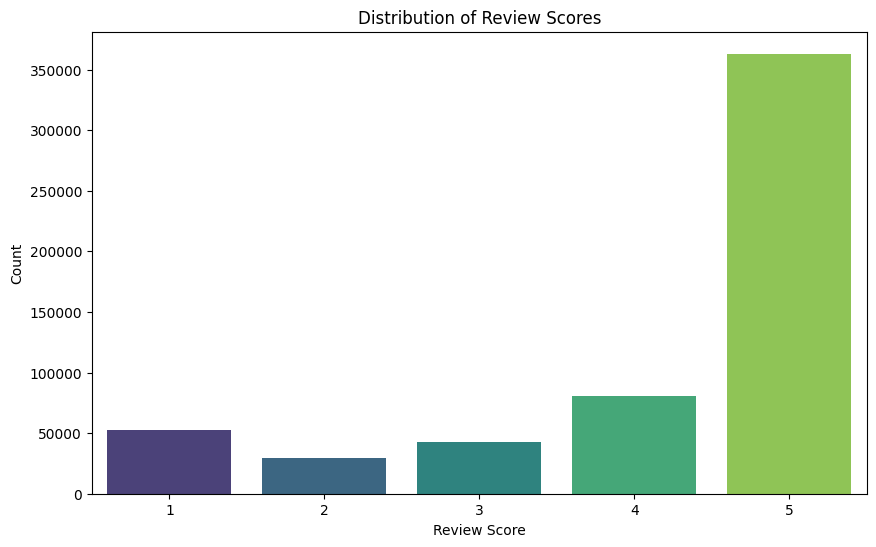

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


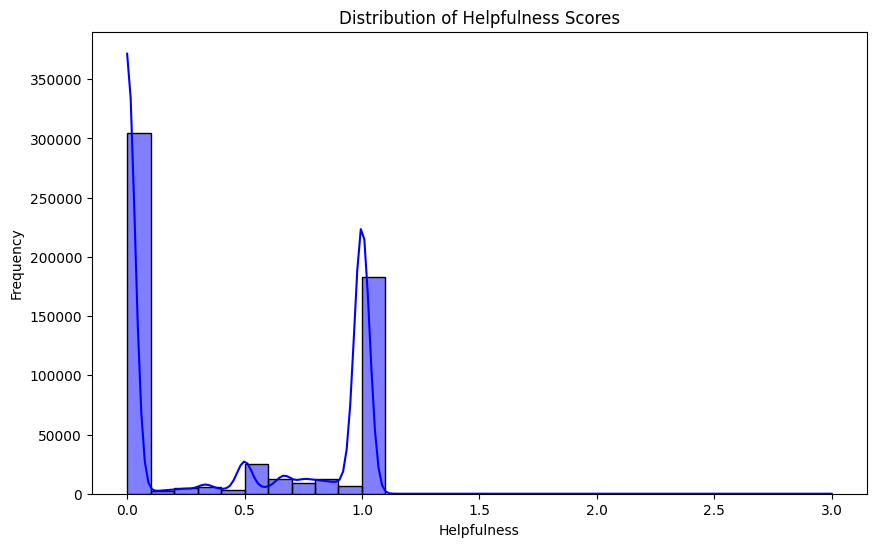

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Helpfulness'], bins=30, kde=True, color='blue')
plt.title('Distribution of Helpfulness Scores')
plt.xlabel('Helpfulness')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()


In [ ]:
# prompt: ---------------------------------------------------------------------------
# ModuleNotFoundError                       Traceback (most recent call last)
# Cell In[9], line 1
# ----> 1 from wordcloud import WordCloud
# ModuleNotFoundError: No module named 'wordcloud'

!pip install wordcloud
from wordcloud import WordCloud


In [ ]:
df['Review Time'] = pd.to_datetime(df['Review Time'], format='%d-%m-%Y')
df['Year'] = df['Review Time'].dt.year

avg_score_per_year = df.groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Score', data=avg_score_per_year, marker='o', color='green')
plt.title('Average Review Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Helpfulness', data=df, palette='coolwarm')
plt.title('Helpfulness Ratio vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Helpfulness Ratio')
plt.show()


In [ ]:
from collections import Counter

positive_words = ' '.join(df[df['Score'] == 5]['lemmatized_text']).split()
negative_words = ' '.join(df[df['Score'] == 1]['lemmatized_text']).split()

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

positive_common_words = dict(positive_word_freq.most_common(20))
negative_common_words = dict(negative_word_freq.most_common(20))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(positive_common_words.values()), y=list(positive_common_words.keys()), palette='Blues_r')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x=list(negative_common_words.values()), y=list(negative_common_words.keys()), palette='Reds_r')
plt.title('Top Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()


In [ ]:
model_accuracies = {
    "Logistic Regression": 0.7159,
    "Multinomial Naive Bayes": 0.6574,
    "Gradient Boosting": 0.6755,
    "SVM (Linear Kernel)": 0.7153,
    "Random Forest": 0.7023
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
